## Classification (분류)

### Binary Classification (이진 분류)
----
* 둘 중 하나를 결정하는 문제
* 합격/불합격, 스팸메일인지/아닌지
* 관심 있는 (맞추고자 하는) class를 양성이라고 함 (⚠️주의: 양성이 좋은 경우는 아님)
    - 스팸메일을 분류하는 문제의 경우 스팸메일이 양성

### Logistic Regression (로지스틱 회귀)

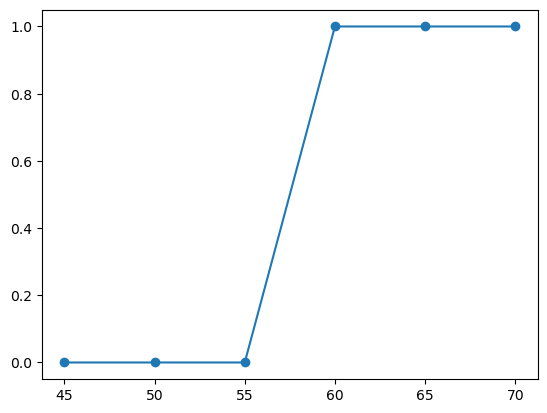

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## 60이상이면 합격하는 이진분류
score = np.array([45, 50, 55, 60, 65, 70])
result = np.array([0, 0, 0, 1, 1, 1])

plt.plot(score, result, "o-")

이 함수는 선형 회귀로 표현하기 어려움. 따라서 위와 같은 함수를 잘 맞추는 함수 $f(wx+b)$가 있다고 가정

위 함수는 $y=p(y=1|x)$.

**IDEA**: $p(y=1|x)=f(wx+b)$를 만족하는 함수 $f$를 찾자.

$P=p(y=1|x)$라 하면, $P\in [0,1].$

$f^{-1}(P)=wx+b$는 $(-\infty,\infty)$ 범위를 만족해야함

* Odds: $\frac{P}{1-P} \in [0,\infty)$
* logit function: $logit(P)=log\frac{P}{1-P}  \in  (-\infty,\infty)$

**로지스틱 회귀 전개**

$X:=wx+b$

$log\frac{P}{1-P} = X$

$log\frac{1-P}{P}=-X$

$\frac{1}{P}-1=e^{-X}$

$P=\frac{1}{1+e^{-X}}$ : 로지스틱 함수, $\sigma(X)$. (시그모이드 함수로 불리기도 하나 정확한 표현은 아님)

$P=\frac{1}{1+e^{-(wx+b)}}$

**임계값 설정**
$$
y =
\begin{cases}
1 & \text{if } P \geq 0.5 \\
0 & \text{if } otherwise
\end{cases}
$$


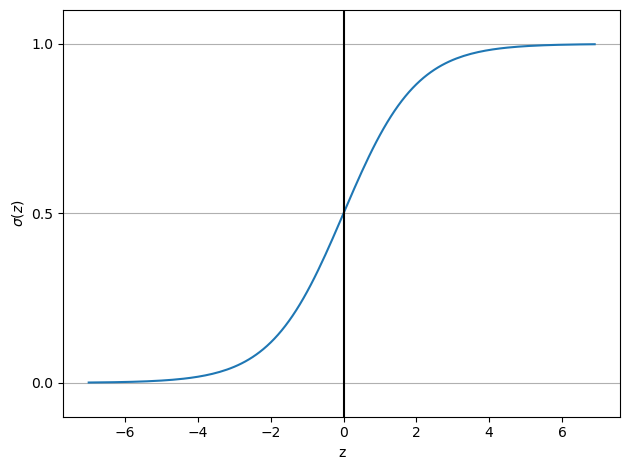

: 

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('figures/03_02.png', dpi=300)
plt.show()

#### 사이킷런을 사용하여 로지스틱 회귀 모델 훈련

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [17]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay)

# 1) 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y   # stratify=y: class 비율을 train/test에 동일하게 유지 (불균형 데이터셋에 유리)
)

# 2) 스케일링 (표준화)
# - feature마다 평균 0, 분산 1로 변환
# - train 데이터로 평균과 표준편차 계산(fit) 후 transform, test 데이터는 transform만 수행
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

# 3) 모델 학습
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_sc, y_train)

# 4) 예측 및 평가
y_pred = lr.predict(X_test_sc)
print("Accuracy :", accuracy_score(y_test, y_pred)) # 전체 sample 중 맞게 예측한 sample의 비율

Accuracy : 0.9824561403508771


In [26]:
lr.predict_proba(X_test_sc[:3, :])

array([[9.99999941e-01, 5.88824186e-08],
       [1.13351672e-05, 9.99988665e-01],
       [9.93589175e-01, 6.41082462e-03]])

In [27]:
lr.predict_proba(X_test_sc[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [28]:
lr.predict_proba(X_test_sc[:3, :]).argmax(axis=1)

array([0, 1, 0])

In [29]:
lr.predict(X_test_sc[:3, :])

array([0, 1, 0])

In [30]:
lr.predict(X_test_sc[0, :].reshape(1, -1))

array([0])